This example shows how RGroupDecomposition works with stereochemistry matching.
If stereochemistry is specified in the core, the RGroup decomposition correctly assigns R1 and R2.

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import rdRGroupDecomposition

/Users/kellebr5/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: to-Python converter for std::vector<boost::shared_ptr<RDKit::ROMol>, std::allocator<boost::shared_ptr<RDKit::ROMol> > > already registered; second conversion method ignored.


In [2]:
import pandas as pd
from rdkit.Chem import PandasTools
PandasTools.molRepresentation = "svg"

In [3]:
m = Chem.MolFromSmarts("C1CCO[C@@](*)(*)1")

Perhaps we should file a bug that smarts doesn't show stereochem here.

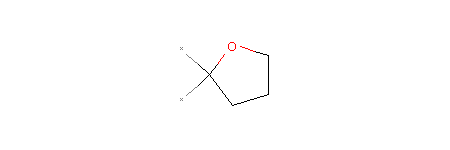

In [4]:
m

Make some example stereochemistries

In [5]:
el = "NOPS"
mols = []
for e in el:
    smi = "C1CCO[C@@H](%s)1"%e
    print(smi)
    m = Chem.MolFromSmiles(smi)
    mols.append(m)
    smi = "C1CCO[C@H](%s)1"%e
    print(smi)
    m = Chem.MolFromSmiles(smi)
    mols.append(m)
    for e2 in el:
        if e != e2:
            smi = "C1CCO[C@@](%s)(%s)1"%(e,e2)
            m = Chem.MolFromSmiles(smi)
            if m:
                print(smi)
                mols.append(m)

C1CCO[C@@H](N)1
C1CCO[C@H](N)1
C1CCO[C@@](N)(O)1
C1CCO[C@@](N)(P)1
C1CCO[C@@](N)(S)1
C1CCO[C@@H](O)1
C1CCO[C@H](O)1
C1CCO[C@@](O)(N)1
C1CCO[C@@](O)(P)1
C1CCO[C@@](O)(S)1
C1CCO[C@@H](P)1
C1CCO[C@H](P)1
C1CCO[C@@](P)(N)1
C1CCO[C@@](P)(O)1
C1CCO[C@@](P)(S)1
C1CCO[C@@H](S)1
C1CCO[C@H](S)1
C1CCO[C@@](S)(N)1
C1CCO[C@@](S)(O)1
C1CCO[C@@](S)(P)1


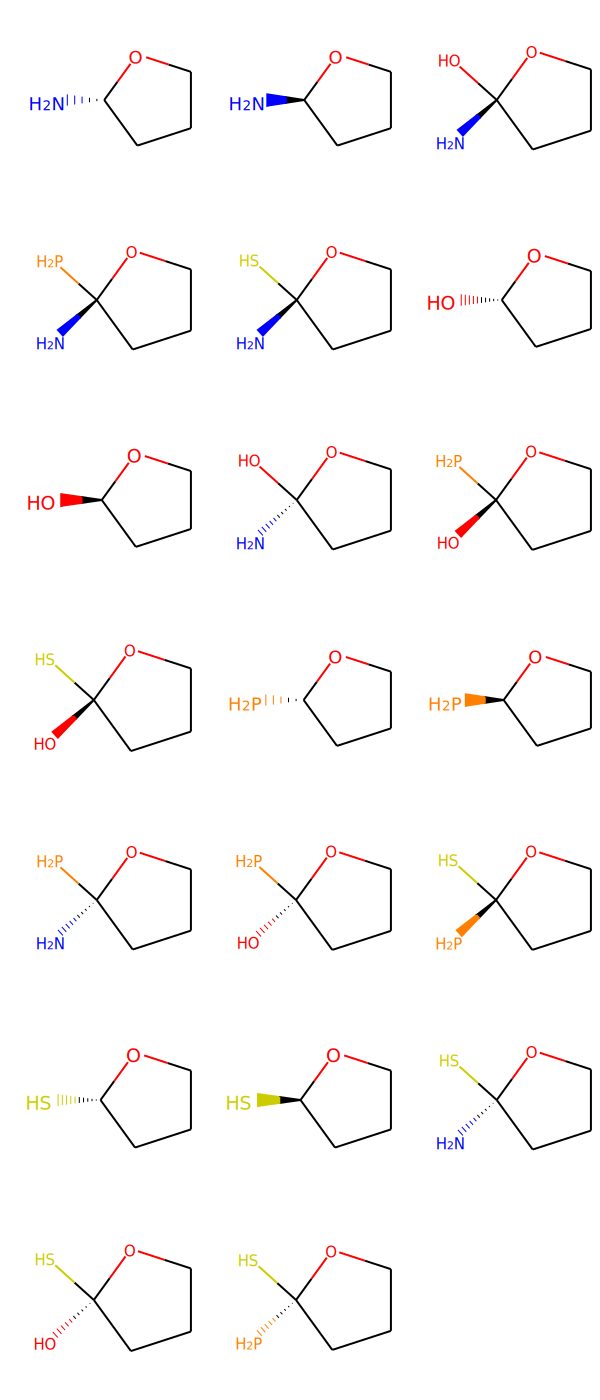

In [6]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

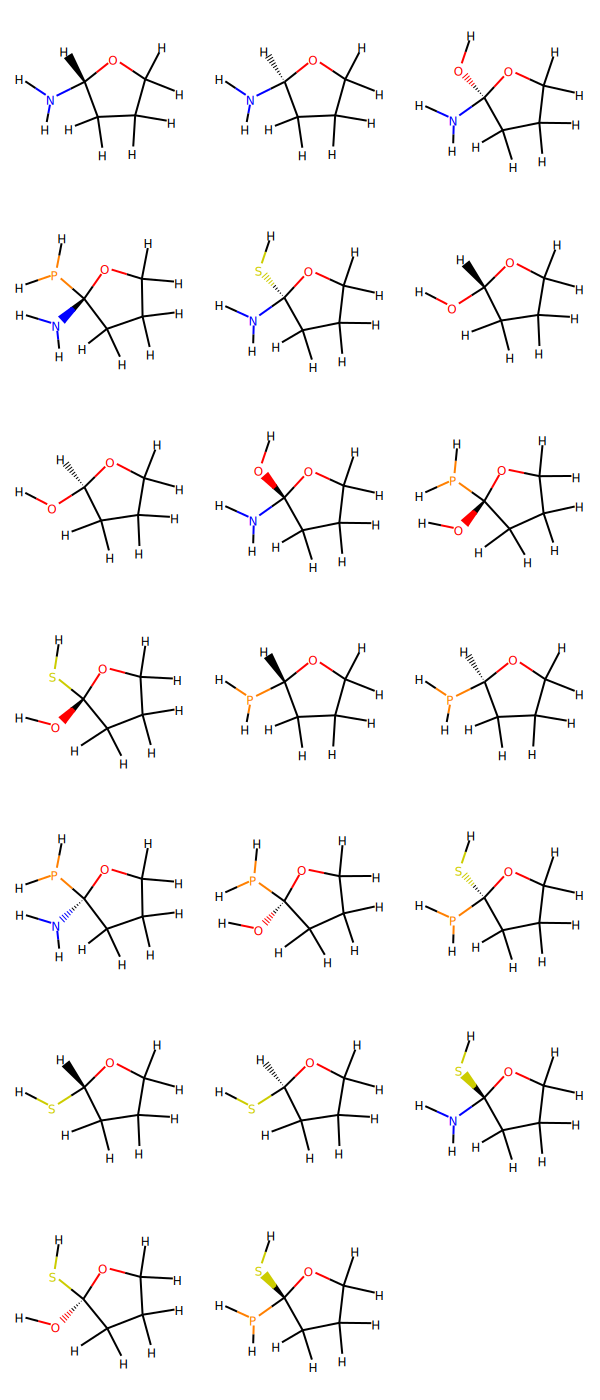

In [7]:
hmols = [Chem.AddHs(m) for m in mols]
Draw.MolsToGridImage(hmols)

In [8]:
core = Chem.MolFromSmarts("C1CCO[C@@](*)(*)1")

In [9]:
core.GetSubstructMatch(core)

(0, 1, 2, 3, 4, 5, 6)

Make RGroup decomposition!

In [10]:
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)

In [11]:
for i,m in enumerate(mols):
    rgroups.Add(m)
    if i == 10:
        break

We need to call process after all molecules are added.  To optimize the RGroups.

In [12]:
rgroups.Process()

True

In [13]:
groups = rgroups.GetRGroupsAsColumns()
frame = pd.DataFrame(groups)
PandasTools.ChangeMoleculeRendering(frame)

The first two (0 and 1) are different due to the sterochemistry difference.
I still haven't found a way to show the core with stereochem which is annoying.

In [14]:
frame

,Core,R1,R2
0,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\n\n\nN\nH\nH\nR1:1\n,\n \n\n\nH\nR2:2\n
1,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\nH\nR1:1\n,\n \n\n\n\n\n\n\nN\nH\nH\nR2:2\n
2,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\nO\nH\nR1:1\n,\n \n\n\n\n\n\n\nN\nH\nH\nR2:2\n
3,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\n\n\nP\nH\nH\nR1:1\n,\n \n\n\n\n\n\n\nN\nH\nH\nR2:2\n
4,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\nS\nH\nR1:1\n,\n \n\n\n\n\n\n\nN\nH\nH\nR2:2\n
5,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\nO\nH\nR1:1\n,\n \n\n\nH\nR2:2\n
6,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\nH\nR1:1\n,\n \n\n\n\n\nO\nH\nR2:2\n
7,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\n\n\nN\nH\nH\nR1:1\n,\n \n\n\n\n\nO\nH\nR2:2\n
8,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\n\n\nP\nH\nH\nR1:1\n,\n \n\n\n\n\nO\nH\nR2:2\n
9,\n \n\n\n\n\n\n\n\n\n\n\n\nO\n?\n?\n,\n \n\n\n\n\nS\nH\nR1:1\n,\n \n\n\n\n\nO\nH\nR2:2\n


Let's try the same with stereochemistry in the core.

**Note that the core has symmetry and the analysis nicely supports this during 
the side chain optimization**

In [15]:
core = Chem.MolFromSmarts("C1CCOC1")
rgroups = rdRGroupDecomposition.RGroupDecomposition(core)
for m in mols:
    rgroups.Add(m)
rgroups.Process()
frame = pd.DataFrame(rgroups.GetRGroupsAsColumns())
PandasTools.ChangeMoleculeRendering(frame)
frame

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2017.09.1.dev1
	BOOST: 1_58


RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 153 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2017.09.1.dev1
	BOOST: 1_58
